# 800_RQ1_Analysis 
## Purpose 
Final analysis of our Reseach Question 1 
## Datasets 
* _Input_: RQ1.csv
* _Output_: N/A

#### <font color='red'> Note that results may vary slightly from those shown in report if run after the 10/05/2018 as current season was incomplete when last run.</font> 


## RQ1: Underrated & Overrated Players
### Is there underrated or overrated players within the game? 

* ### Can a players in-game rating be used to predict real-life form? or is there previous average form a better indicator for this?
* ### What factors lead to a player becoming underrated or overrated in the game?

## Quick Overview of this notebook (as it is quiet long)

1. Load Data
2. Identify Underperforming & Overperforming players in each position
   - Goalkeepers
   - Defenders
   - Midfielders
   - Forwards
3. Determine which underperforming players are actually overrated
4. Determine which overperforming players are actually underrated
5. Explore reasons as to why players may be underrated or overrated
6. Finally generate the games most overrated and underrated teams according to our method.

## Prerequisites:
We define a players:

* **Form:** Total Points / Total Appearances 
* **Previous Average Form:** Average Form for years played within the top 5 leagues in the last 5 years
* **Current Average Form:** Current Form for players playing within the top 5 leagues this season

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline

In [2]:
np.random.seed(0)
# np.random.seed(0) makes the random numbers predictable,
# ie. the same set of numbers will appear every time the notebook is run,
# this is important for the linear regression further down in the notebook.

#### Reading in our RQ1 dataset.

In [3]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [4]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

#### Quick glance at the dataframe.

In [5]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Cresswell,Defender,West Ham United,English Premier League,27.0,England,76.0,https://cdn.sofifa.org/18/players/189615.png,False,False,33.666667,2.821782,35.0,2.571429
2,Aaron Hughes,Defender,Heart of Midlothian,Scottish Premiership,37.0,Northern Ireland,71.0,https://cdn.sofifa.org/18/players/17725.png,True,False,37.000000,1.216216,0.0,0.000000
3,Aaron Hunt,Midfielder,Hamburger SV,German Bundesliga,30.0,Germany,76.0,https://cdn.sofifa.org/18/players/158138.png,True,False,29.500000,3.050847,28.0,2.428571
4,Aaron Lennon,Midfielder,Everton,English Premier League,30.0,England,77.0,https://cdn.sofifa.org/18/players/152747.png,False,False,30.000000,2.633333,28.0,1.892857


## 2. Overperforming & Underperforming Goalkeepers

#### Get dataframe full of goalkeepers only

In [6]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

#### Split the goalkeeper dataframe into two sub dataframes,one for goalkeepers under 85 rated, and the other for 85 and above rated.

In [7]:
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]

#### Apply linear regression to the two datafreame

In [8]:
w = average_goalkeepers['overall'].values[:,np.newaxis] # [:,np.newaxis] is used to increase the dimension of the existing array by one more dimension
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Resources:

Stackoverflow which was used to help implement our linear regression method.<br> *https://stackoverflow.com/questions/49859625/linear-regression-how-to-find-the-distance-between-the-points-and-the-predictio*<br>
<br>
Stackoverflow which explains how [:,np.newaxis] works.<br> *https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it*

In [9]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### How will Overperforming and Underperforming players be determined?

* Any player rated under 85, and over twice the average distance will be determined as overperforming and underperforming.
* Any player rated 85 or over, and over the average vertical distance will be to determined as overperforming and underperforming 

#### Find the vertical distance

In [10]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Find the average vertical distance

In [12]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

In [13]:
neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

#### Find players who match the criteria to be considered overperforming or underperforming

In [14]:
underperforming_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
underperforming_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [15]:
overperforming_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
overperforming_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

#### Find the 'Form' the linear regression model predicts that the overperforming and underperforming players have, using their known 'overall' rating

In [16]:
underperforming_average_gk['Predicted Form'] = average_goalkeepers_model.predict(underperforming_average_gk['overall'].values[:,np.newaxis])
underperforming_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(underperforming_worldclass_gk['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
overperforming_average_gk['Predicted Form'] = average_goalkeepers_model.predict(overperforming_average_gk['overall'].values[:,np.newaxis])
overperforming_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(overperforming_worldclass_gk['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Join all underperforming goalkeepers into one dataframe, and overperforming into another 

In [18]:
underperforming_goalkeepers = pd.concat([underperforming_average_gk ,underperforming_worldclass_gk ],axis=0)

In [19]:
overperforming_goalkeepers = pd.concat([overperforming_average_gk ,overperforming_worldclass_gk ],axis=0)

#### Graph a representation of our linear regression model

In [20]:
ag1 = underperforming_average_gk['overall'].values[:,np.newaxis] 
ag2 = underperforming_average_gk['Previous Average Form'].values 
ag3 = overperforming_average_gk['overall'].values[:,np.newaxis] 
ag4 = overperforming_average_gk['Previous Average Form'].values 

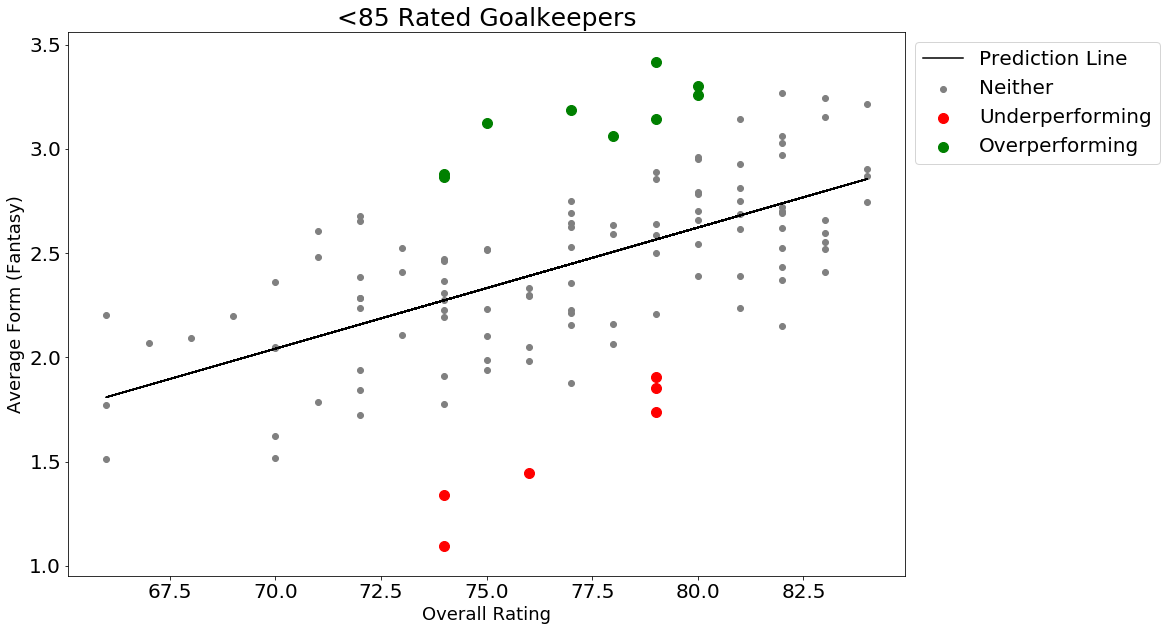

In [21]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ag1, ag2,color='red',s=100) 
plt.scatter(ag3, ag4,color='green',s=100) 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('<85 Rated Goalkeepers', fontsize=25)
plt.xlabel("Overall Rating", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show() 

In [22]:
wg1 = underperforming_worldclass_gk['overall'].values[:,np.newaxis] 
wg2 = underperforming_worldclass_gk['Previous Average Form'].values 
wg3 = overperforming_worldclass_gk['overall'].values[:,np.newaxis] 
wg4 = overperforming_worldclass_gk['Previous Average Form'].values

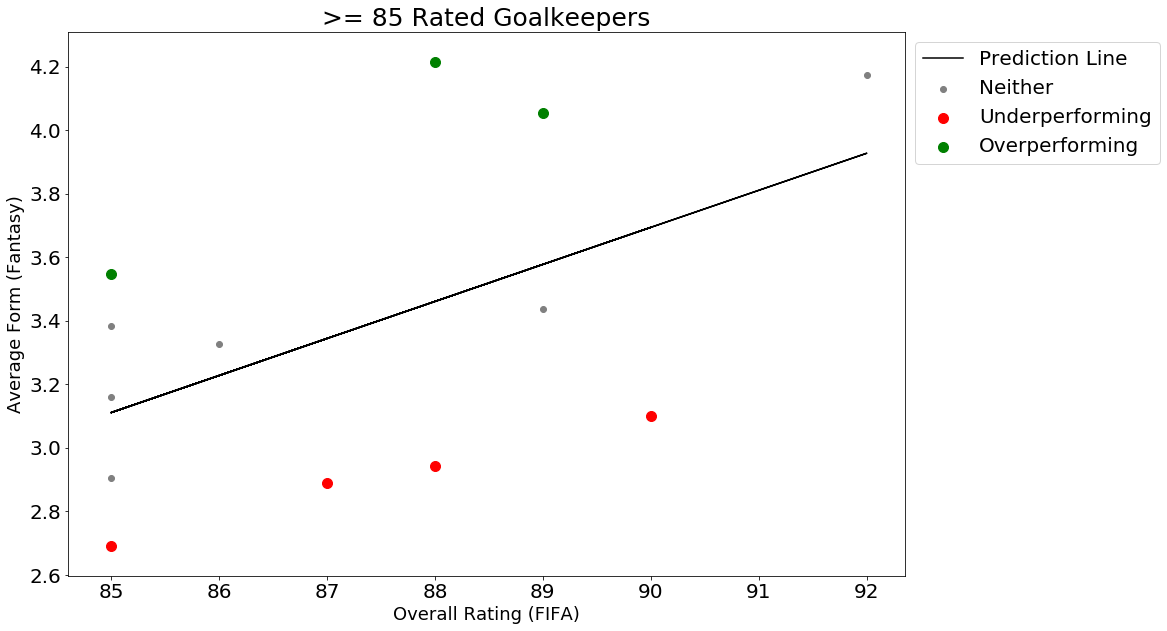

In [23]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wg1, wg2,color='red',s=100) 
plt.scatter(wg3, wg4,color='green',s=100) 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('>= 85 Rated Goalkeepers', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

## 2. Overperforming & Underperforming  Defenders

#### Follow the exact same proceedure for defenders

In [24]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [25]:
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]

In [26]:
w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

In [31]:
neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [32]:
underperforming_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
underperforming_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [33]:
overperforming_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
overperforming_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

In [34]:
underperforming_average_def['Predicted Form'] = average_defenders_model.predict(underperforming_average_def['overall'].values[:,np.newaxis])
underperforming_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(underperforming_worldclass_def['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
overperforming_average_def['Predicted Form'] = average_defenders_model.predict(overperforming_average_def['overall'].values[:,np.newaxis])
overperforming_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(overperforming_worldclass_def['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
underperforming_defenders = pd.concat([underperforming_average_def ,underperforming_worldclass_def ],axis=0)

In [37]:
overperforming_defenders = pd.concat([overperforming_average_def ,overperforming_worldclass_def ],axis=0)

In [38]:
ad1 = underperforming_average_def['overall'].values[:,np.newaxis] 
ad2 = underperforming_average_def['Previous Average Form'].values 
ad3 = overperforming_average_def['overall'].values[:,np.newaxis] 
ad4 = overperforming_average_def['Previous Average Form'].values 

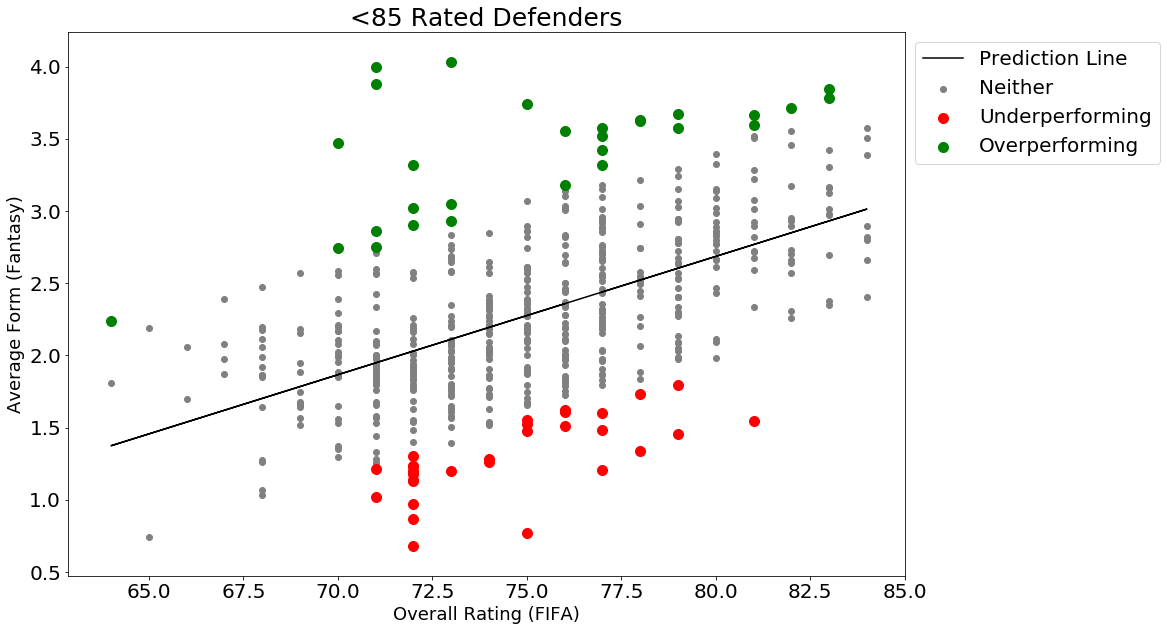

In [39]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ad1, ad2,color='red',s=100) 
plt.scatter(ad3, ad4,color='green',s=100) 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('<85 Rated Defenders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

In [40]:
wd1 = underperforming_worldclass_def['overall'].values[:,np.newaxis] 
wd2 = underperforming_worldclass_def['Previous Average Form'].values 
wd3 = overperforming_worldclass_def['overall'].values[:,np.newaxis] 
wd4 = overperforming_worldclass_def['Previous Average Form'].values

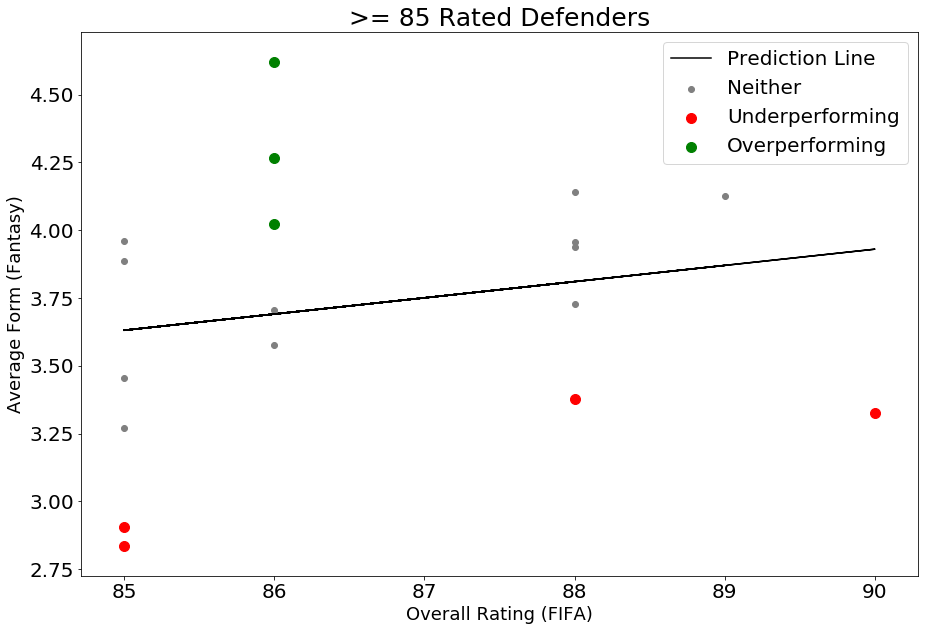

In [41]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wd1, wd2,color='red',s=100) 
plt.scatter(wd3, wd4,color='green',s=100) 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('>= 85 Rated Defenders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

## 2. Overperforming & Underperforming Midfielders

#### Follow the exact same proceedure for Midfielders

In [42]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [43]:
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]

In [44]:
w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

In [49]:
neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [50]:
underperforming_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
underperforming_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [51]:
overperforming_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
overperforming_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

In [52]:
underperforming_average_mid['Predicted Form'] = average_midfielders_model.predict(underperforming_average_mid['overall'].values[:,np.newaxis])
underperforming_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(underperforming_worldclass_mid['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
overperforming_average_mid['Predicted Form'] = average_midfielders_model.predict(overperforming_average_mid['overall'].values[:,np.newaxis])
overperforming_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(overperforming_worldclass_mid['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
underperforming_midfielders = pd.concat([underperforming_average_mid ,underperforming_worldclass_mid ],axis=0)

In [55]:
overperforming_midfielders = pd.concat([overperforming_average_mid ,overperforming_worldclass_mid ],axis=0)

In [56]:
am1 = underperforming_average_mid['overall'].values[:,np.newaxis] 
am2 = underperforming_average_mid['Previous Average Form'].values 
am3 = overperforming_average_mid['overall'].values[:,np.newaxis] 
am4 = overperforming_average_mid['Previous Average Form'].values 

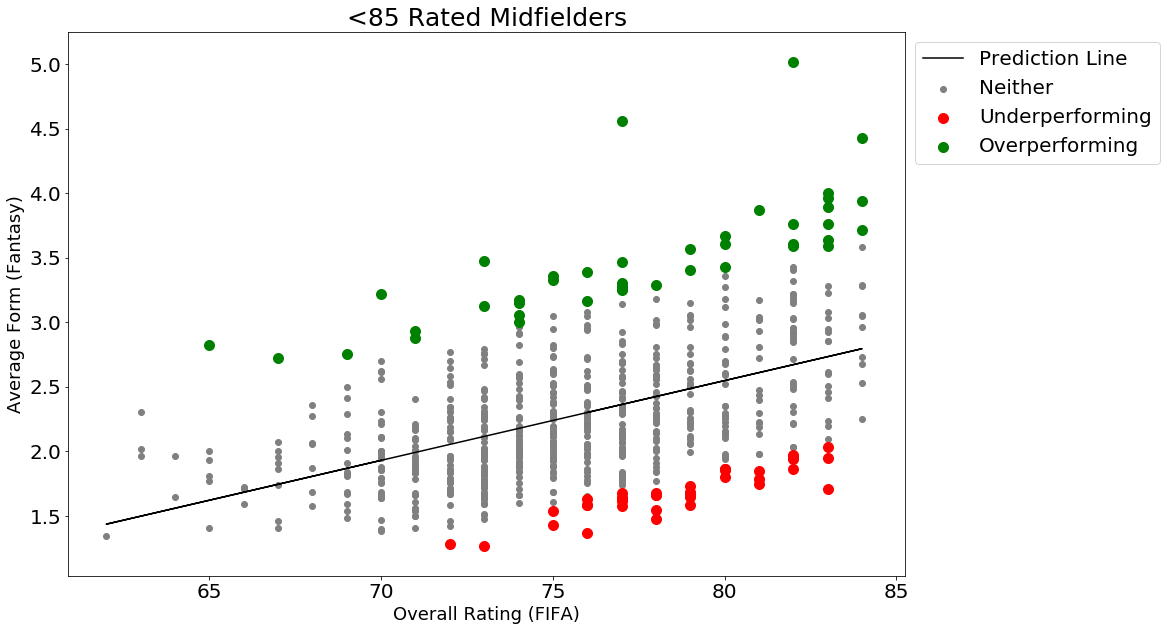

In [57]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(am1, am2,color='red',s=100) 
plt.scatter(am3, am4,color='green',s=100) 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('<85 Rated Midfielders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show() 

In [58]:
wm1 = underperforming_worldclass_mid['overall'].values[:,np.newaxis] 
wm2 = underperforming_worldclass_mid['Previous Average Form'].values 
wm3 = overperforming_worldclass_mid['overall'].values[:,np.newaxis] 
wm4 = overperforming_worldclass_mid['Previous Average Form'].values

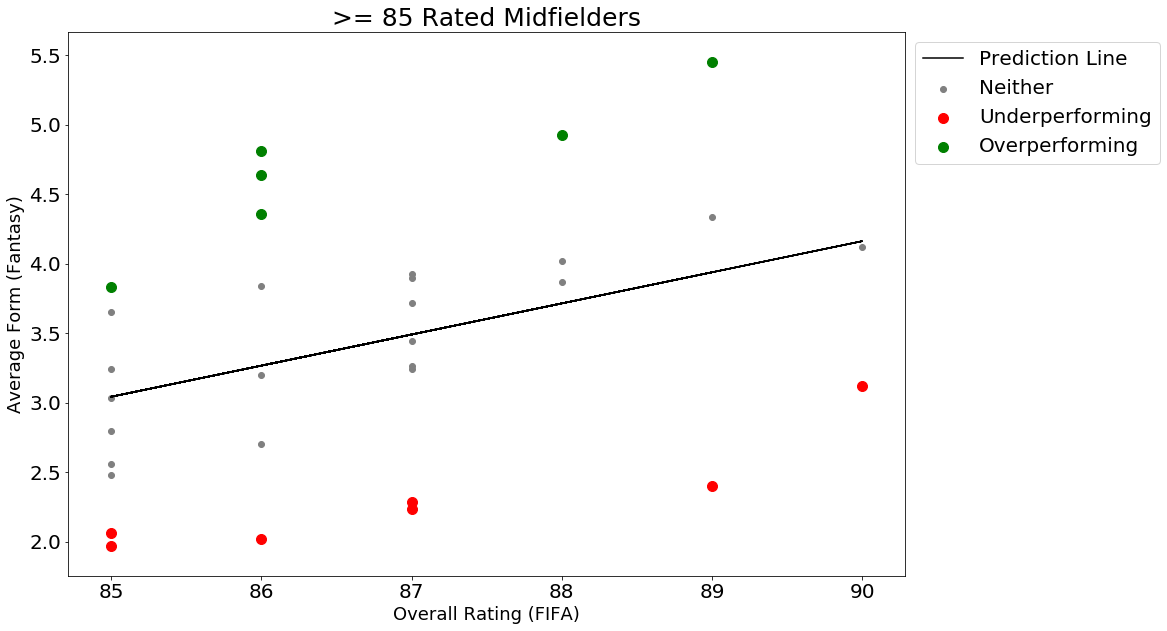

In [59]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wm1, wm2,color='red',s=100) 
plt.scatter(wm3, wm4,color='green',s=100) 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('>= 85 Rated Midfielders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

## 2. Overperforming & Underperforming Forwards

#### Follow the exact same proceedure for Forwards

In [60]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [61]:
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]

In [62]:
w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

In [67]:
neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [68]:
underperforming_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
underperforming_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [69]:
overperforming_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
overperforming_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

In [70]:
underperforming_average_fwd['Predicted Form'] = average_forwards_model.predict(underperforming_average_fwd['overall'].values[:,np.newaxis])
underperforming_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(underperforming_worldclass_fwd['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
overperforming_average_fwd['Predicted Form'] = average_forwards_model.predict(overperforming_average_fwd['overall'].values[:,np.newaxis])
overperforming_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(overperforming_worldclass_fwd['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
underperforming_forwards = pd.concat([underperforming_average_fwd ,underperforming_worldclass_fwd ],axis=0)

In [73]:
overperforming_forwards = pd.concat([overperforming_average_fwd ,overperforming_worldclass_fwd ],axis=0)

In [74]:
af1 = underperforming_average_fwd['overall'].values[:,np.newaxis] 
af2 = underperforming_average_fwd['Previous Average Form'].values 
af3 = overperforming_average_fwd['overall'].values[:,np.newaxis] 
af4 = overperforming_average_fwd['Previous Average Form'].values 

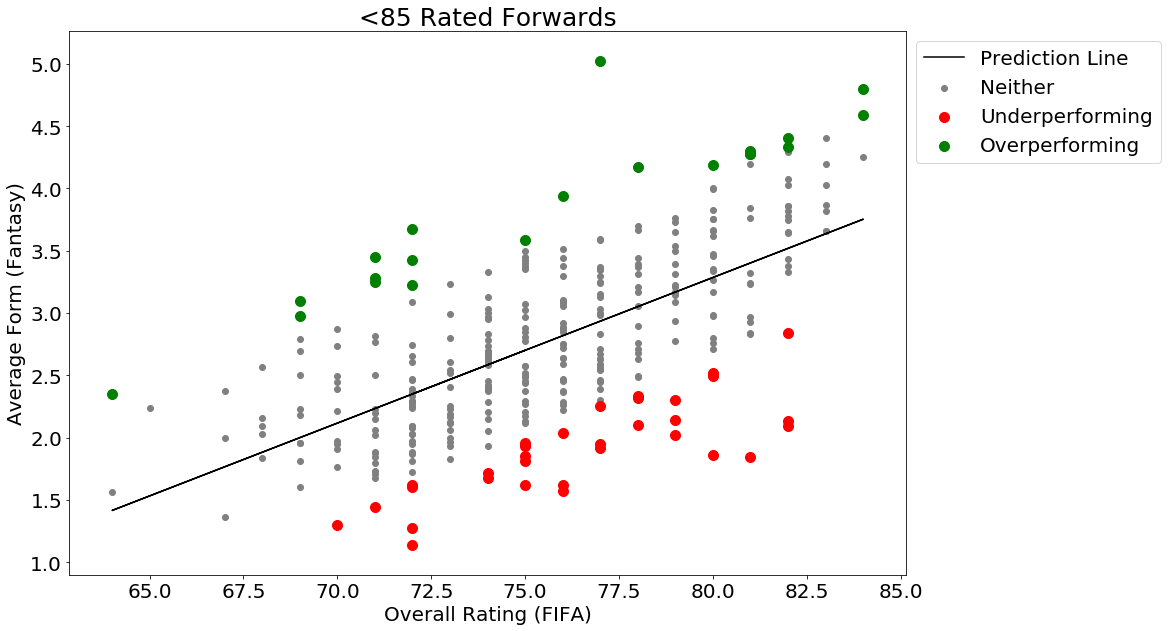

In [75]:
plt.figure(figsize=(15,10))
plt.scatter(w, z,color='grey') 
plt.scatter(af1, af2,color='red',s=100) 
plt.scatter(af3, af4,color='green',s=100) 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('<85 Rated Forwards', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.xlabel("Overall Rating (FIFA)", fontsize=20)
plt.ylabel("Average Form (Fantasy)", fontsize=20)
plt.savefig('../../data/analysis/Average Forwards.png')
plt.show() 

In [76]:
wf1 = underperforming_worldclass_fwd['overall'].values[:,np.newaxis] 
wf2 = underperforming_worldclass_fwd['Previous Average Form'].values 
wf3 = overperforming_worldclass_fwd['overall'].values[:,np.newaxis] 
wf4 = overperforming_worldclass_fwd['Previous Average Form'].values

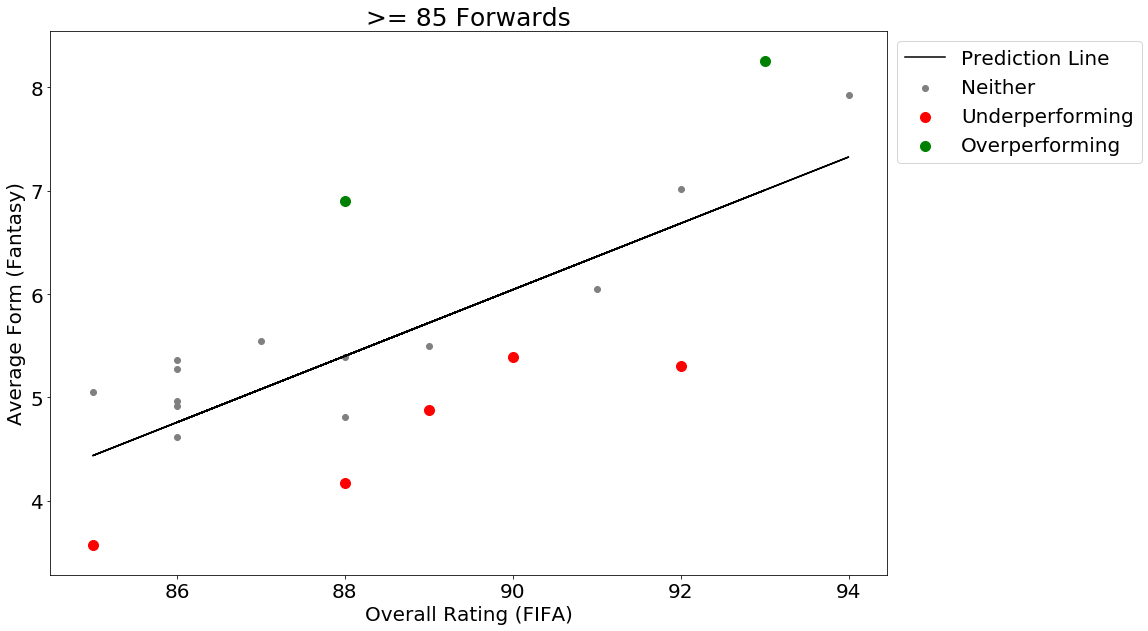

In [77]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wf1, wf2,color='red',s=100) 
plt.scatter(wf3, wf4,color='green',s=100) 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('>= 85 Forwards', fontsize=25) 
plt.xticks(fontsize = 20)
plt.xlabel("Overall Rating (FIFA)", fontsize=20)
plt.yticks(fontsize = 20)
plt.ylabel("Average Form (Fantasy)", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.savefig('../../data/analysis/World Class Forwards.png')
plt.show()

## 3. Determining Overrated Players From Underperforming Players

#### Group all underperforming players together in a new dataframe

In [78]:
underperforming_players = pd.concat([underperforming_goalkeepers,underperforming_defenders,underperforming_midfielders,underperforming_forwards], axis=0).reset_index().drop('index',1)

#### Make sure that everyone has played atleast 1 game this season

In [79]:
underperforming_players = underperforming_players[underperforming_players['Apps This Season']>0]

#### Find the difference between this seasons form and both the 'Predicted Form' and their 'Previous Average Form' 

In [80]:
underperforming_players['FIFA Rating Distance'] = abs(underperforming_players['Current Average Form'] - underperforming_players['Predicted Form'])
underperforming_players['Previous Form Distance'] = abs(underperforming_players['Current Average Form'] - underperforming_players['Previous Average Form'])
underperforming_players['Difference'] = abs(underperforming_players['FIFA Rating Distance'] - underperforming_players['Previous Form Distance'])

#### Find which one is closer to 'this season's form'

Note: Players who's 'Previous Average Form' is closer to this seasons form, will be determined as overrated

In [81]:
underperforming_players.loc[underperforming_players['FIFA Rating Distance']<underperforming_players['Previous Form Distance'],'Verdict'] = 'Underperforming'
underperforming_players.loc[underperforming_players['FIFA Rating Distance']>underperforming_players['Previous Form Distance'],'Verdict'] = 'Overrated'
underperforming_players.loc[underperforming_players['FIFA Rating Distance'] == underperforming_players['Previous Form Distance'],'Verdict'] = 'Equal'

#### Plot a pie chart which shows the percentage of overrated players among the underperforming players

In [82]:
x = underperforming_players['Verdict'].value_counts()

Text(0,0.5,'')

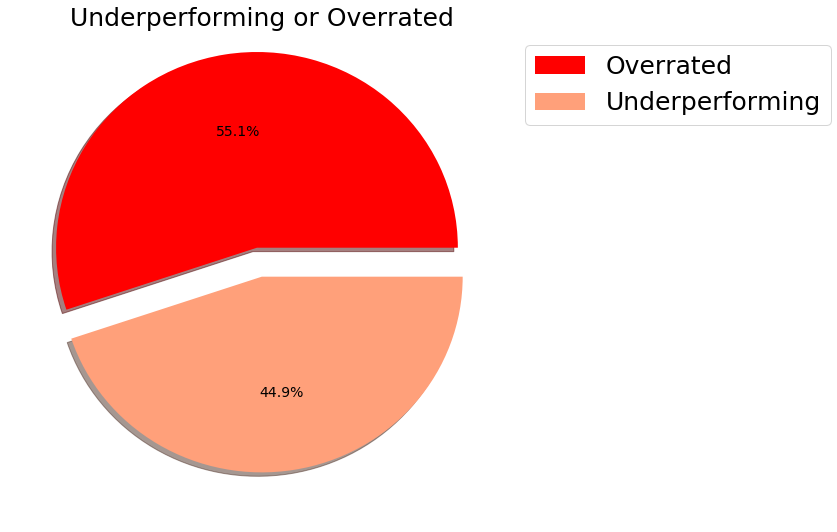

In [83]:
explode = (0.15, 0)
labels = ['','']
x.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['r','lightsalmon'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=x.index)
plt.gca().set_title('',color='white')
plt.title('Underperforming or Overrated',fontsize=25,color='Black')
plt.ylabel('')

##### Result:
* 56.8% of the underperforming players we identified are actually overrated in this years game.
* The remaining 43.2% were just underperforming in previous seasons but are justifying their rating this year. 

#### Make a new dataframe which holds the most overrated players, and show the top 10 most overrated players in the game, according to our method.

In [84]:
overrated_players = underperforming_players[underperforming_players['Verdict']=='Overrated']
overrated_players = overrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [85]:
overrated_players.head(10)[['Players','Position','club','overall','Predicted Form','Previous Average Form','Current Average Form','Difference']]

,Players,Position,club,overall,Predicted Form,Previous Average Form,Current Average Form,Difference
0,Marco Verratti,Midfielder,Paris Saint-Germain,87.0,3.489731,2.231343,1.909091,1.258388
1,N'Golo Kante,Midfielder,Chelsea,87.0,3.489731,2.284404,2.151515,1.205328
2,Manu Trigueros,Forward,Villarreal CF,82.0,3.518352,2.094891,2.212121,1.189000
3,Luka Modric,Midfielder,Real Madrid CF,89.0,3.937332,2.400000,2.583333,1.170665
4,Erik Moran,Forward,CD Leganes,72.0,2.349742,1.275862,1.000000,1.073880
5,Jorge Mere,Defender,1. FC Koln,78.0,2.522151,1.339286,1.428571,1.004294
6,Muhamed Besic,Midfielder,Everton,76.0,2.302002,1.371429,1.000000,0.930574
7,Nordin Amrabat,Forward,CD Leganes,79.0,3.167769,2.300000,1.982759,0.867769
8,Tobias Strobl,Defender,Borussia Monchengladbach,76.0,2.358253,1.513761,1.500000,0.844491
9,Alexis Sanchez,Forward,Arsenal,89.0,5.720774,4.879518,3.800000,0.841256


## 4. Determining Underrated Players From Overperforming Players

#### Group all overperforming players together in a new dataframe

In [86]:
overperforming_players = pd.concat([overperforming_goalkeepers,overperforming_defenders,overperforming_midfielders,overperforming_forwards], axis=0).reset_index().drop('index',1)

#### Make sure that everyone has played atleast 1 game this season

In [87]:
overperforming_players = overperforming_players[overperforming_players['Apps This Season']>0]

#### Find the difference between this seasons form and both the 'Predicted Form' and their 'Previous Average Form' 

In [88]:
overperforming_players['FIFA Rating Distance'] = abs(overperforming_players['Current Average Form'] - overperforming_players['Predicted Form'])
overperforming_players['Previous Form Distance'] = abs(overperforming_players['Current Average Form'] - overperforming_players['Previous Average Form'])
overperforming_players['Difference'] = abs(overperforming_players['FIFA Rating Distance'] - overperforming_players['Previous Form Distance'])

#### Find which one is closer to 'this season's form'

Note: Players who's 'Previous Average Form' is closer to this seasons form, will be determined as underated

In [89]:
overperforming_players.loc[overperforming_players['FIFA Rating Distance']<overperforming_players['Previous Form Distance'],'Verdict'] = 'Overperforming'
overperforming_players.loc[overperforming_players['FIFA Rating Distance']>overperforming_players['Previous Form Distance'],'Verdict'] = 'Underrated'
overperforming_players.loc[overperforming_players['FIFA Rating Distance'] == overperforming_players['Previous Form Distance'],'Verdict'] = 'Equal'

#### Plot a pie chart which shows the percentage of underrated players among the overperforming players

In [90]:
y = overperforming_players['Verdict'].value_counts()

Text(0,0.5,'')

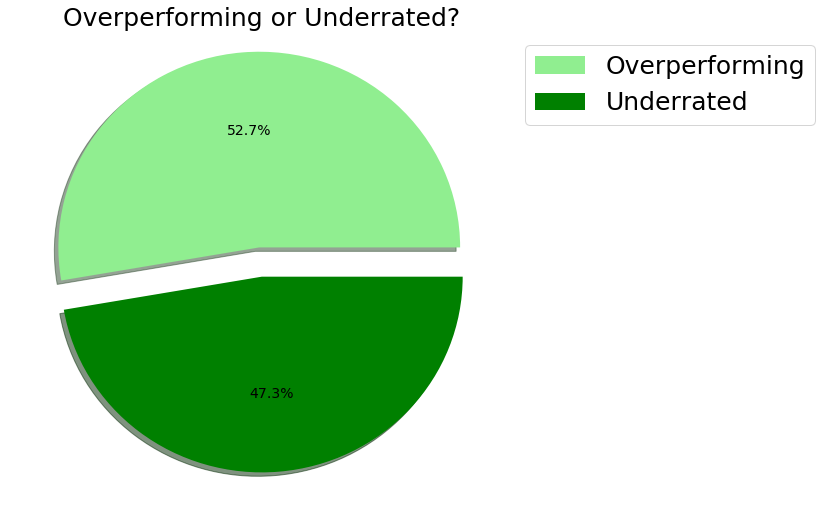

In [91]:
explode = (0.15, 0)
labels = ['','']
y.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['lightgreen','green'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=y.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Overperforming or Underrated?',fontsize=25,color='Black')
plt.ylabel('')

##### Result:
* 40.4% of the overperforming players we identified are actually underrated in this years game.
* The remaining 43.2% were just underperforming in previous seasons but are justifying their rating this year. 

#### Make a new dataframe which holds the most underrated players, and show the top 10 most underrated players in the game according to our method

In [92]:
underrated_players = overperforming_players[overperforming_players['Verdict']=='Underrated']
underrated_players = underrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [93]:
underrated_players.head(10)[['Players','Position','club','overall','Predicted Form','Previous Average Form','Current Average Form','Difference']]

,Players,Position,club,overall,Predicted Form,Previous Average Form,Current Average Form,Difference
0,Alexander Meier,Midfielder,Eintracht Frankfurt,77.0,2.363785,4.563025,6.000000,2.199240
1,Junior Stanislas,Midfielder,Bournemouth,73.0,2.116653,3.476190,3.473684,1.354525
2,Marco Reus,Midfielder,Borussia Dortmund,86.0,3.265931,4.806452,4.700000,1.327617
3,Roberto Firmino,Midfielder,Liverpool,83.0,2.734483,3.890909,4.500000,1.156426
4,Sadio Mane,Midfielder,Liverpool,84.0,2.796266,3.936170,4.285714,1.139904
5,Lucas Hernandez,Defender,Atletico Madrid,77.0,2.440202,3.576923,4.269231,1.136721
6,Nabil Fekir,Midfielder,Olympique Lyonnais,82.0,2.672700,3.764706,5.357143,1.092006
7,James Rodriguez,Midfielder,FC Bayern Munich,86.0,3.265931,4.357143,4.681818,1.091212
8,Dimitri Payet,Midfielder,Olympique de Marseille,83.0,2.734483,4.005780,3.903226,1.066188
9,Mauro Icardi,Forward,Inter,84.0,3.752074,4.793548,6.500000,1.041475


## 5. Reasons as to why players may be underrated or overrated within the game

In [94]:
underrated_goalkeepers = underrated_players[underrated_players['Position'] == 'Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position'] == 'Defender']
underrated_midfielders = underrated_players[underrated_players['Position'] == 'Midfielder']
underrated_forwards = underrated_players[underrated_players['Position'] == 'Forward']

In [95]:
overrated_goalkeepers = overrated_players[overrated_players['Position'] == 'Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position'] == 'Defender']
overrated_midfielders = overrated_players[overrated_players['Position'] == 'Midfielder']
overrated_forwards = overrated_players[overrated_players['Position'] == 'Forward']

### 1. Age

In [96]:
age = pd.DataFrame(columns = ['Average Age'])
age.set_value('All Players','Average Age',RQ1.mean()['age'])
age.set_value('Overrated Players','Average Age',overrated_players.mean()['age'])
age.set_value('Underrated Players','Average Age',underrated_players.mean()['age'])

,Average Age
All Players,27.914
Overrated Players,25.8372
Underrated Players,26.2857


#### 2. Apps

In [97]:
apps = pd.DataFrame(columns = ["All Players","Underrated Players", "Overrated Players"])
apps.set_value('Average Apps/Season','All Players',RQ1.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Underrated Players',underrated_players.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Overrated Players',overrated_players.mean()['Average Apps/Season'])
apps.set_value('Apps This Season','All Players',RQ1.mean()['Apps This Season'])
apps.set_value('Apps This Season','Underrated Players',underrated_players.mean()['Apps This Season'])
apps.set_value('Apps This Season','Overrated Players',overrated_players.mean()['Apps This Season'])

,All Players,Underrated Players,Overrated Players
Average Apps/Season,29.0289,28.2238,30.4302
Apps This Season,14.7515,25.2857,22.3488


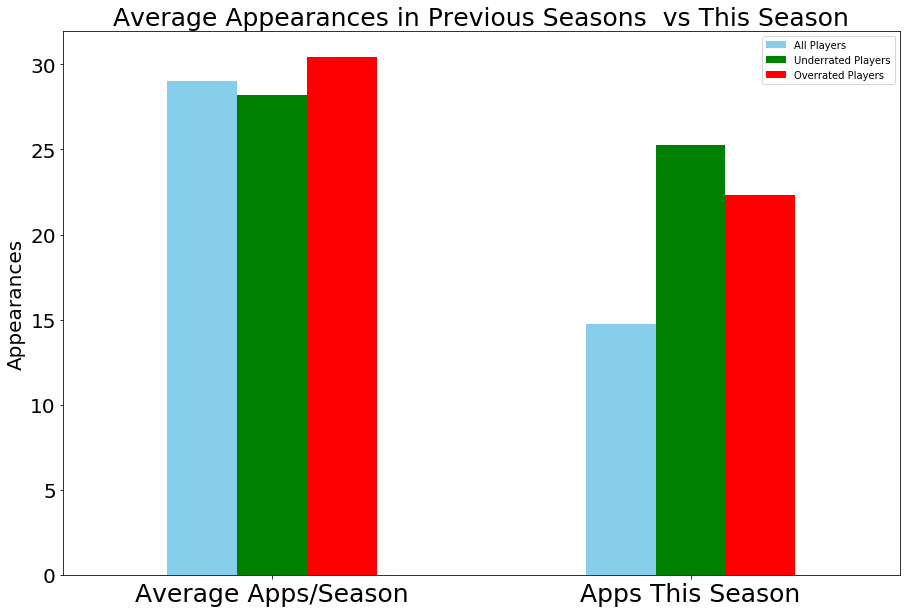

In [98]:
colors = ['skyblue','green','r']
ax = apps.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12,color=colors)
ax.set_title("Average Appearances in Previous Seasons  vs This Season",size=25)
ax.set_xlabel("")
ax.set_ylabel("Appearances", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=25)
plt.show()

#### 3. Position

In [99]:
position_overperforming = overperforming_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_overperforming 

Position
Midfielder    34
Defender      20
Forward       11
Goalkeeper     9
Name: Players, dtype: int64

In [100]:
position_underrated = underrated_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_underrated = position_underrated.reindex(['Midfielder','Defender','Forward','Goalkeeper'])
position_underrated

Position
Midfielder    20
Defender       9
Forward        2
Goalkeeper     4
Name: Players, dtype: int64

In [101]:
position_underrated = np.where(np.isnan(position_underrated), 0, position_underrated)

In [102]:
underated_difference = position_overperforming  - position_underrated
underated_difference

Position
Midfielder    14
Defender      11
Forward        9
Goalkeeper     5
Name: Players, dtype: int64

In [103]:
underated_percentage = (position_underrated/position_overperforming)*100
underated_percentage.round(2).to_frame()

,Players
Position,
Midfielder,58.82
Defender,45.00
Forward,18.18
Goalkeeper,44.44


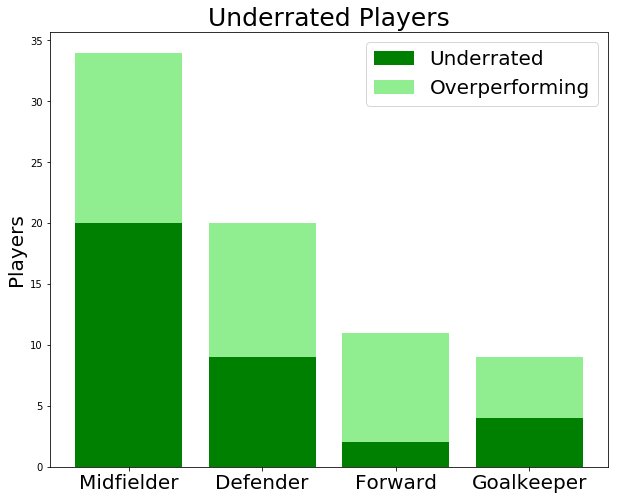

In [104]:
X = range(4)
labels_order = [0,1,2,3]
positions_labels = ['Midfielder', 'Defender', 'Forward','Goalkeeper']

plt.figure(figsize=(10,8))
plt.bar(X, position_underrated, color = 'g')
plt.bar(X, underated_difference, color = 'lightgreen', bottom = position_underrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Underrated','Overperforming'])
plt.title('Underrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.show()

In [105]:
position_underperforming = underperforming_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_underperforming 

Position
Midfielder    32
Defender      21
Forward       19
Goalkeeper     6
Name: Players, dtype: int64

In [106]:
position_overrated = overrated_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_overrated = position_overrated.reindex(['Midfielder','Defender','Forward','Goalkeeper'])
position_overrated

Position
Midfielder    24.0
Defender       6.0
Forward       13.0
Goalkeeper     NaN
Name: Players, dtype: float64

In [107]:
position_overrated = np.where(np.isnan(position_overrated), 0, position_overrated)

In [108]:
overrated_difference = position_underperforming - position_overrated
overrated_difference

Position
Midfielder     8.0
Defender      15.0
Forward        6.0
Goalkeeper     6.0
Name: Players, dtype: float64

In [109]:
overated_percentage = (position_overrated/position_underperforming)*100
overated_percentage.round(2).to_frame()

,Players
Position,
Midfielder,75.00
Defender,28.57
Forward,68.42
Goalkeeper,0.00


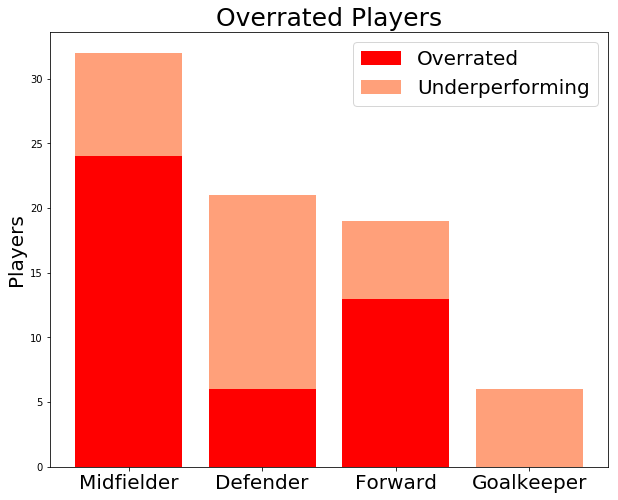

In [110]:
X = range(4)
labels_order = [0,1,2,3]
positions_labels = ['Midfielder', 'Defender', 'Forward','Goalkeeper']

plt.figure(figsize=(10,8))
plt.bar(X, position_overrated, color = 'r')
plt.bar(X, overrated_difference, color = 'lightsalmon', bottom = position_overrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Overrated','Underperforming'])
plt.title('Overrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.show()

### 4. league

In [111]:
league_overperforming = overperforming_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_overperforming 

league
English Premier League      18
French Ligue 1              18
German Bundesliga           15
Italian Serie A             14
Spanish Primera Division     9
Name: Players, dtype: int64

In [112]:
league_underrated = underrated_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_underrated = league_underrated.reindex(['English Premier League','French Ligue 1','German Bundesliga','Italian Serie A','Spanish Primera Division'])
league_underrated

league
English Premier League      7
French Ligue 1              9
German Bundesliga           7
Italian Serie A             8
Spanish Primera Division    4
Name: Players, dtype: int64

In [113]:
league_underrated = np.where(np.isnan(league_underrated), 0, league_underrated)

In [114]:
underrated_difference1 = league_overperforming - league_underrated
underrated_difference1

league
English Premier League      11
French Ligue 1               9
German Bundesliga            8
Italian Serie A              6
Spanish Primera Division     5
Name: Players, dtype: int64

In [115]:
underated_percentage1 = (league_underrated/league_overperforming)*100
underated_percentage1.round(2).to_frame()

,Players
league,
English Premier League,38.89
French Ligue 1,50.00
German Bundesliga,46.67
Italian Serie A,57.14
Spanish Primera Division,44.44


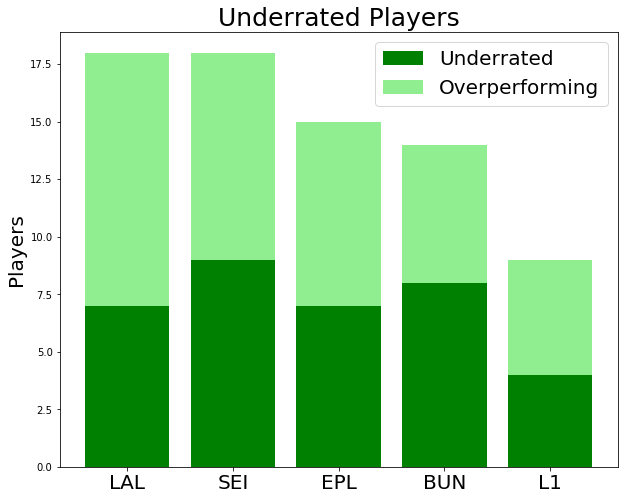

In [116]:
X = range(5)
labels_order = [0,1,2,3,4]
positions_labels = ['LAL','SEI','EPL','BUN' , 'L1']

plt.figure(figsize=(10,8))
plt.bar(X, league_underrated, color = 'g')
plt.bar(X, underrated_difference1, color = 'lightgreen', bottom = league_underrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Underrated','Overperforming'])
plt.title('Underrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.show()

In [117]:
league_underperforming = underperforming_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_underperforming 

league
Spanish Primera Division    28
Italian Serie A             16
English Premier League      15
German Bundesliga           15
French Ligue 1               4
Name: Players, dtype: int64

In [118]:
league_overrated = overrated_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_overrated = league_overrated.reindex(['Spanish Primera Division','Italian Serie A','English Premier League','German Bundesliga' , 'French Ligue 1'])
league_overrated

league
Spanish Primera Division    20
Italian Serie A              6
English Premier League       9
German Bundesliga            6
French Ligue 1               2
Name: Players, dtype: int64

In [119]:
league_overrated = np.where(np.isnan(league_overrated), 0, league_overrated)

In [120]:
overrated_difference1 = league_underperforming - league_overrated
overrated_difference1

league
Spanish Primera Division     8
Italian Serie A             10
English Premier League       6
German Bundesliga            9
French Ligue 1               2
Name: Players, dtype: int64

In [121]:
overated_percentage1 = (league_overrated/league_underperforming)*100
overated_percentage1.round(2).to_frame()

,Players
league,
Spanish Primera Division,71.43
Italian Serie A,37.50
English Premier League,60.00
German Bundesliga,40.00
French Ligue 1,50.00


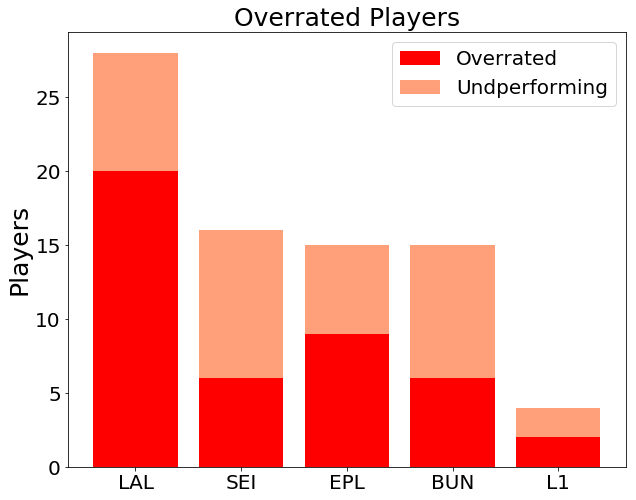

In [122]:
X = range(5)
labels_order = [0,1,2,3,4]
positions_labels = ['LAL','SEI','EPL','BUN' , 'L1']

plt.figure(figsize=(10,8))
plt.bar(X, league_overrated, color = 'r')
plt.bar(X, overrated_difference1, color = 'lightsalmon', bottom = league_overrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Overrated','Undperforming'])
plt.title('Overrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=25)
plt.yticks(fontsize=20)

plt.show()

#### 5. Injury Prone

In [123]:
RQ1 = RQ1.iloc[1:] #dropping null row that stops below graph showing

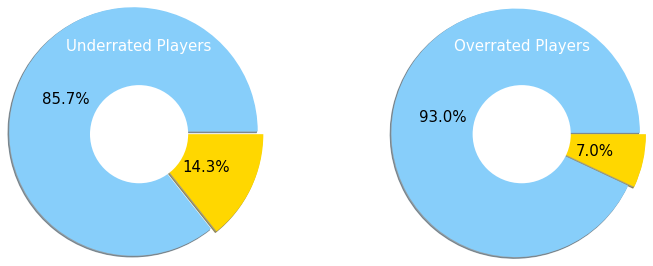

In [124]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['injury_prone_trait'].plot(figsize=(20,20))

plt.subplot(the_grid[4,2], aspect=1)
explode2 = (0.1, 0)
plt.pie(underrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightskyblue','gold'],explode=explode2)
plt.gca().set_title('Underrated Players',color='white',fontsize=15)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0)
plt.pie(overrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightskyblue','gold'],explode=explode2)
plt.gca().set_title('Overrated Players',color='white',fontsize=15)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

## 6. The Most Underreated & Overrated XI's


In [125]:
underrated_goalkeepers = underrated_players[underrated_players['Position']=='Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position']=='Defender']
underrated_midfielders = underrated_players[underrated_players['Position']=='Midfielder']
underrated_forwards = underrated_players[underrated_players['Position']=='Forward']

In [126]:
underrated_goalkeepers = underrated_goalkeepers.sort_values('Difference',ascending=False)
underrated_goalkeeper = underrated_goalkeepers.head(1)

underrated_defenders = underrated_defenders.sort_values('Difference',ascending=False)
underrated_defender = underrated_defenders.head(4)


underrated_midfielders = underrated_midfielders.sort_values('Difference',ascending=False)
underrated_midfielder = underrated_midfielders.head(4)


underrated_forwards = underrated_forwards.sort_values('Difference',ascending=False)
underrated_forward = underrated_forwards.head(2)

underrated_XI= pd.concat([underrated_goalkeeper,underrated_defender,underrated_midfielder,underrated_forward])

In [127]:
underrated_XI['photo'] = underrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
underrated_XI = underrated_XI.reset_index()
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].round(2)
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].astype(str)
Squad_Rating = underrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [128]:
underrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,22,Jan Oblak,Goalkeeper,Atletico Madrid,Spanish Primera Division,24.0,Slovenia,88.0,https://cdn.sofifa.org/1x/18/players/200389.png,False,...,26.33,4.22,35.0,4.49,0.75,3.46,1.02,0.27,0.75,Underrated
1,5,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21.0,France,77.0,https://cdn.sofifa.org/1x/18/players/220814.png,False,...,8.67,3.58,26.0,4.27,1.14,2.44,1.83,0.69,1.14,Underrated
2,16,Fabinho,Defender,AS Monaco,French Ligue 1,23.0,Brazil,83.0,https://cdn.sofifa.org/1x/18/players/209499.png,False,...,33.75,3.79,32.0,3.84,0.85,2.93,0.91,0.06,0.85,Underrated
3,23,Issa Cissokho,Defender,Amiens SC Football,French Ligue 1,32.0,Senegal,71.0,https://cdn.sofifa.org/1x/18/players/138704.png,False,...,23.00,2.86,18.0,2.72,0.91,1.95,0.77,0.14,0.64,Underrated
4,25,Yoann Andreu,Defender,Angers SCO,French Ligue 1,28.0,France,72.0,https://cdn.sofifa.org/1x/18/players/190579.png,False,...,23.50,3.02,23.0,2.83,0.99,2.03,0.80,0.20,0.60,Underrated
5,0,Alexander Meier,Midfielder,Eintracht Frankfurt,German Bundesliga,34.0,Germany,77.0,https://cdn.sofifa.org/1x/18/players/121170.png,True,...,29.75,4.56,1.0,6.00,2.20,2.36,3.64,1.44,2.20,Underrated
6,1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27.0,England,73.0,https://cdn.sofifa.org/1x/18/players/189446.png,False,...,21.00,3.48,19.0,3.47,1.36,2.12,1.36,0.00,1.35,Underrated
7,2,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28.0,Germany,86.0,https://cdn.sofifa.org/1x/18/players/188350.png,True,...,31.00,4.81,10.0,4.70,1.54,3.27,1.43,0.11,1.33,Underrated
8,3,Roberto Firmino,Midfielder,Liverpool,English Premier League,25.0,Brazil,83.0,https://cdn.sofifa.org/1x/18/players/201942.png,False,...,41.25,3.89,36.0,4.50,1.16,2.73,1.77,0.61,1.16,Underrated
9,9,Mauro Icardi,Forward,Inter,Italian Serie A,24.0,Argentina,84.0,https://cdn.sofifa.org/1x/18/players/201399.png,False,...,38.75,4.79,32.0,6.50,1.04,3.75,2.75,1.71,1.04,Underrated


In [129]:
JoinedUnderratedImages = underrated_XI['photo'].as_matrix() 
GK1 = mpimg.imread(JoinedUnderratedImages [0]) 
DF1 = mpimg.imread(JoinedUnderratedImages [1]) 
DF2 = mpimg.imread(JoinedUnderratedImages [2]) 
DF3 = mpimg.imread(JoinedUnderratedImages [3]) 
DF4 = mpimg.imread(JoinedUnderratedImages [4]) 
MD1 = mpimg.imread(JoinedUnderratedImages [5]) 
MD2 = mpimg.imread(JoinedUnderratedImages [6]) 
MD3 = mpimg.imread(JoinedUnderratedImages [7]) 
MD4 = mpimg.imread(JoinedUnderratedImages [8]) 
FW1 = mpimg.imread(JoinedUnderratedImages [9]) 
FW2 = mpimg.imread(JoinedUnderratedImages [10])

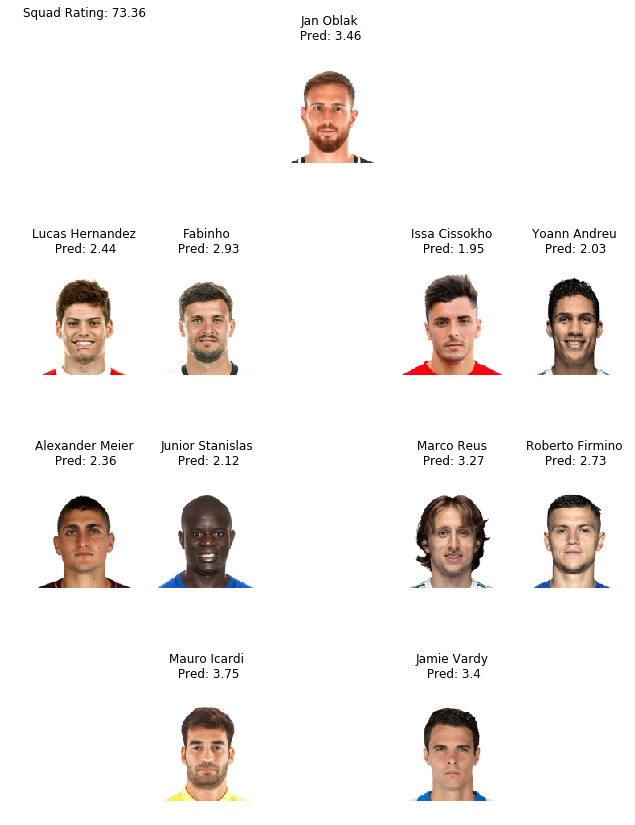

In [137]:
mpl.rcParams['font.size'] = 10
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(underrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[0] + '\n' ) 
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(underrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[1] + '\n' ) 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(underrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[2] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(underrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(underrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[4] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(underrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(underrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(underrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(underrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(underrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[9] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(underrated_XI['Players'].loc[10] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[10] + '\n') 
axarr[3,5].axis('off')


f.savefig('../../data/analysis/Underrated_XI.png')


In [131]:
overrated_goalkeepers = overrated_players[overrated_players['Position']=='Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position']=='Defender']
overrated_midfielders = overrated_players[overrated_players['Position']=='Midfielder']
overrated_forwards = overrated_players[overrated_players['Position']=='Forward']

In [132]:
overrated_goalkeepers = overrated_goalkeepers.sort_values('Difference',ascending=False)
overrated_goalkeeper = overrated_goalkeepers.head(1)

overrated_defenders = overrated_defenders.sort_values('Difference',ascending=False)
overrated_defender = overrated_defenders.head(4)


overrated_midfielders = overrated_midfielders.sort_values('Difference',ascending=False)
overrated_midfielder = overrated_midfielders.head(4)


overrated_forwards = overrated_forwards.sort_values('Difference',ascending=False)
overrated_forward = overrated_forwards.head(2)

overrated_XI= pd.concat([overrated_goalkeeper,overrated_defender,overrated_midfielder,overrated_forward])

In [133]:
overrated_XI['photo'] = overrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
overrated_XI = overrated_XI.reset_index()
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].round(2)
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].astype(str)
Squad_Rating = overrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [134]:
overrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,5,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20.0,Spain,78.0,https://cdn.sofifa.org/1x/18/players/223033.png,False,...,28.00,1.34,21.0,1.43,-1.18,2.52,1.09,0.09,1.00,Overrated
1,8,Tobias Strobl,Defender,Borussia Monchengladbach,German Bundesliga,27.0,Germany,76.0,https://cdn.sofifa.org/1x/18/players/207894.png,False,...,27.25,1.51,4.0,1.50,-0.84,2.36,0.86,0.01,0.84,Overrated
2,18,Ximo Navarro,Defender,UD Las Palmas,Spanish Primera Division,27.0,Spain,75.0,https://cdn.sofifa.org/1x/18/players/198023.png,False,...,44.00,1.52,29.0,1.31,-0.75,2.28,0.97,0.21,0.75,Overrated
3,23,Raphael Varane,Defender,Real Madrid CF,Spanish Primera Division,24.0,France,85.0,https://cdn.sofifa.org/1x/18/players/201535.png,False,...,26.25,2.90,26.0,2.69,-0.73,3.63,0.94,0.21,0.73,Overrated
4,0,Marco Verratti,Midfielder,Paris Saint-Germain,French Ligue 1,24.0,Italy,87.0,https://cdn.sofifa.org/1x/18/players/199556.png,False,...,33.50,2.23,22.0,1.91,-1.26,3.49,1.58,0.32,1.26,Overrated
5,1,N'Golo Kante,Midfielder,Chelsea,English Premier League,26.0,France,87.0,https://cdn.sofifa.org/1x/18/players/215914.png,False,...,36.33,2.28,33.0,2.15,-1.21,3.49,1.34,0.13,1.21,Overrated
6,3,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31.0,Croatia,89.0,https://cdn.sofifa.org/1x/18/players/177003.png,False,...,35.00,2.40,24.0,2.58,-1.54,3.94,1.35,0.18,1.17,Overrated
7,6,Muhamed Besic,Midfielder,Everton,English Premier League,24.0,Bosnia Herzegovina,76.0,https://cdn.sofifa.org/1x/18/players/200765.png,True,...,17.50,1.37,2.0,1.00,-0.93,2.3,1.30,0.37,0.93,Overrated
8,2,Manu Trigueros,Forward,Villarreal CF,Spanish Primera Division,25.0,Spain,82.0,https://cdn.sofifa.org/1x/18/players/206545.png,False,...,34.25,2.09,33.0,2.21,-1.42,3.52,1.31,0.12,1.19,Overrated
9,4,Erik Moran,Forward,CD Leganes,Spanish Primera Division,26.0,Spain,72.0,https://cdn.sofifa.org/1x/18/players/201991.png,False,...,9.67,1.28,6.0,1.00,-1.07,2.35,1.35,0.28,1.07,Overrated


In [135]:
JoinedOverratedImages = overrated_XI['photo'].as_matrix()

QM = mpimg.imread('../../data/raw/blankface.png')
DF1 = mpimg.imread(JoinedOverratedImages [0])
DF2 = mpimg.imread(JoinedOverratedImages [1])
DF3 = mpimg.imread(JoinedOverratedImages [2])
DF4 = mpimg.imread(JoinedOverratedImages [3])
MD1 = mpimg.imread(JoinedOverratedImages [4])
MD2 = mpimg.imread(JoinedOverratedImages [5])
MD3 = mpimg.imread(JoinedOverratedImages [6])
MD4 = mpimg.imread(JoinedOverratedImages [7])
FW1 = mpimg.imread(JoinedOverratedImages [8])
FW2 = mpimg.imread(JoinedOverratedImages [9])

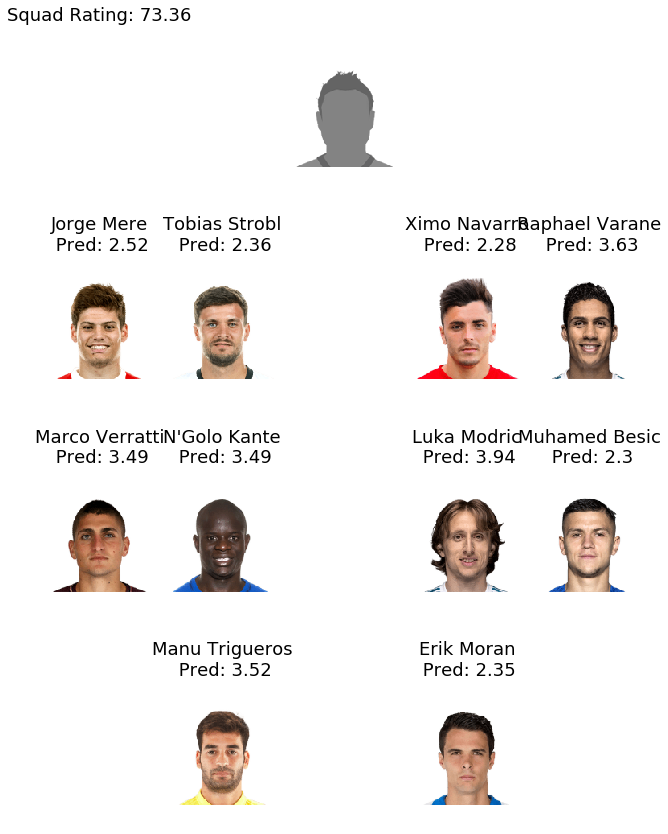

In [136]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()

axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(QM)
axarr[0,4].axis('off')

axarr[1,2].imshow(DF1)
axarr[1,2].set_title(overrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[0] + '\n') 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(overrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[1] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(overrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[2] + '\n') 
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(overrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(overrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[4] + '\n') 

axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(overrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(overrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(overrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(overrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(overrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[9] + '\n' ) 
axarr[3,5].axis('off')



f.savefig('../../data/analysis/Overrated_XI.png')